<a href="https://colab.research.google.com/github/AmalaRaju/DDDS-Projects/blob/main/Project2_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction

The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.

Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.


Be sure to go through the whole data science process and document as such in your Jupyter notebook.


A data dictionary file is available at AWS S3 at Housing Data Dictionary.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

This is a supervised learning problem because we have historical data with labeled outcomes (house prices).

It is a regression problem since the target variable (house price) is continuous.

## Data Collection/Sources


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [ ]:
house_data=pd.read_csv(' https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv')

In [ ]:
house_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
house_data.shape

(2637, 81)

## Data Cleaning


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
house_data.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


In [ ]:
#Make a copy for cleaning
house_copy=house_data.copy()

In [ ]:
house_copy.dtypes

,0
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
...,...
Mo Sold,int64
Yr Sold,int64
Sale Type,object
Sale Condition,object


Check for unique identifiers in a dataset, we can look for columns where all values are unique

In [ ]:
# Identify potential unique identifier columns
unique_cols = [col for col in house_copy.columns if house_copy[col].nunique() == len(house_copy)]

# Display the unique identifier columns
print("Potential Unique Identifier Columns:", unique_cols)

Potential Unique Identifier Columns: ['PID']


The column PID appears to be a unique identifier since it consists of distinct values and can be dropped.

Check for missing values in each of the column

In [ ]:
#Check if there is any null value
house_copy.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


Calculate proportion of nulls

In [ ]:
nulls=house_copy.isnull().sum()
filter=nulls>0
( nulls[ filter ].sort_values( ascending = False ) / house_copy.shape[0] * 100 ).round(1)

,0
Pool QC,99.6
Misc Feature,96.4
Alley,93.2
Fence,80.0
Mas Vnr Type,60.9
Fireplace Qu,48.7
Lot Frontage,17.0
Garage Cond,5.6
Garage Yr Blt,5.6
Garage Finish,5.6


Drop columns having nulls about 50% or more

###Dropping unwanted columns

In [ ]:
#Drop the specified columns
columns_to_drop=['PID','Pool QC','Misc Feature','Alley','Fence','Mas Vnr Type','Fireplace Qu']
house_cleaned=house_data.drop(columns=columns_to_drop)

# Display the updated dataset information
house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   object 
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Street           2637 non-null   object 
 5   Lot Shape        2637 non-null   object 
 6   Land Contour     2637 non-null   object 
 7   Utilities        2637 non-null   object 
 8   Lot Config       2637 non-null   object 
 9   Land Slope       2637 non-null   object 
 10  Neighborhood     2637 non-null   object 
 11  Condition 1      2637 non-null   object 
 12  Condition 2      2637 non-null   object 
 13  Bldg Type        2637 non-null   object 
 14  House Style      2637 non-null   object 
 15  Overall Qual     2637 non-null   int64  
 16  Overall Cond     2637 non-null   int64  
 17  Year Built    

In [ ]:
house_cleaned.dtypes.value_counts()

,count
object,37
int64,26
float64,11


In [ ]:
#Check if there is any null value
house_cleaned.isnull().sum()>0

,0
MS SubClass,False
MS Zoning,False
Lot Frontage,True
Lot Area,False
Street,False
...,...
Mo Sold,False
Yr Sold,False
Sale Type,False
Sale Condition,False


Now we need to handle the remaining columns having nulls

In [ ]:
sums = house_cleaned.isna().sum()
sums[sums > 0]

,0
Lot Frontage,449
Mas Vnr Area,23
Bsmt Qual,73
Bsmt Cond,73
Bsmt Exposure,76
BsmtFin Type 1,73
BsmtFin SF 1,1
BsmtFin Type 2,74
BsmtFin SF 2,1
Bsmt Unf SF,1


In [ ]:
# Identify columns with missing values
missing_cols = house_cleaned.columns[house_cleaned.isnull().any()]

# Create a DataFrame showing missing count and data type
missing_info = pd.DataFrame({
    "Missing Count": house_cleaned[missing_cols].isnull().sum(),
    "Data Type": house_cleaned[missing_cols].dtypes
})

# Display the result
print(missing_info)


                Missing Count Data Type
Lot Frontage              449   float64
Mas Vnr Area               23   float64
Bsmt Qual                  73    object
Bsmt Cond                  73    object
Bsmt Exposure              76    object
BsmtFin Type 1             73    object
BsmtFin SF 1                1   float64
BsmtFin Type 2             74    object
BsmtFin SF 2                1   float64
Bsmt Unf SF                 1   float64
Total Bsmt SF               1   float64
Bsmt Full Bath              2   float64
Bsmt Half Bath              2   float64
Garage Type               145    object
Garage Yr Blt             147   float64
Garage Finish             147    object
Garage Cars                 1   float64
Garage Area                 1   float64
Garage Qual               147    object
Garage Cond               147    object


Now let's fill the blanks in numerical columns with mean and categorical columns with mode

In [ ]:
#Create a backup before encoding
house_cleaned_notencoded=house_cleaned.copy()

In [ ]:
# Handling numerical columns by filling with the mean
num_cols = house_cleaned.select_dtypes(include=['number']).columns
house_cleaned[num_cols] = house_cleaned[num_cols].apply(lambda x: x.fillna(x.mean()))

# Handling categorical columns by filling with mode
cat_cols = house_cleaned.select_dtypes(include=['object']).columns
house_cleaned[cat_cols] = house_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify if any null values remain
print(house_cleaned.isnull().sum().sum())  # Should print 0 if all nulls are handled


0


In [ ]:
house_cleaned.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [ ]:
# Display unique values for each categorical column
unique_values = {col: house_cleaned[col].unique() for col in cat_cols}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}\n")

Column: MS Zoning
Unique Values: ['RL' 'RM' 'FV' 'C (all)' 'RH' 'I (all)' 'A (agr)']

Column: Street
Unique Values: ['Pave' 'Grvl']

Column: Lot Shape
Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']

Column: Land Contour
Unique Values: ['Lvl' 'Bnk' 'HLS' 'Low']

Column: Utilities
Unique Values: ['AllPub' 'NoSewr' 'NoSeWa']

Column: Lot Config
Unique Values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Column: Land Slope
Unique Values: ['Gtl' 'Mod' 'Sev']

Column: Neighborhood
Unique Values: ['Sawyer' 'IDOTRR' 'Somerst' 'SWISU' 'CollgCr' 'Edwards' 'OldTown'
 'Mitchel' 'NridgHt' 'ClearCr' 'NWAmes' 'Gilbert' 'NoRidge' 'NAmes'
 'Timber' 'MeadowV' 'StoneBr' 'Blmngtn' 'SawyerW' 'Crawfor' 'Veenker'
 'BrkSide' 'GrnHill' 'BrDale' 'NPkVill' 'Greens' 'Blueste' 'Landmrk']

Column: Condition 1
Unique Values: ['Feedr' 'Norm' 'PosA' 'RRAn' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRNe']

Column: Condition 2
Unique Values: ['Norm' 'RRNn' 'Feedr' 'RRAe' 'Artery' 'PosA' 'RRAn' 'PosN']

Column: Bldg Type
Unique Values: ['1

###Encoding

There are 2 columns-Street and Central Air having only 2 values.Let's fix those first.

In [ ]:
house_cleaned['Street'] = house_cleaned['Street'].replace({'Pave': 1, 'Grvl': 0})
house_cleaned['Street'].value_counts()

<ipython-input-118-8ffe6da72a03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_cleaned['Street'] = house_cleaned['Street'].replace({'Pave': 1, 'Grvl': 0})


,count
Street,
1,2625
0,12


In [ ]:
house_cleaned['Central Air'] = house_cleaned['Central Air'].replace({'Y': 1, 'N': 0})
house_cleaned['Central Air'].value_counts()

<ipython-input-119-9d6fa415b29f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_cleaned['Central Air'] = house_cleaned['Central Air'].replace({'Y': 1, 'N': 0})


,count
Central Air,
1,2460
0,177


Since the categorical columns don't have a meaningful order let's do one hot encoding for the rest of the columns

In [ ]:
#Identify category columns
cat_cols = house_cleaned.select_dtypes(include=['object']).columns
cat_cols

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [ ]:
# Convert categorical columns to numerical format using label encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    house_cleaned[col] = le.fit_transform(house_cleaned[col])
    label_encoders[col] = le  # Store the encoder for future use

Lets'examine few columns to check if the encoding is done correctly.

In [ ]:
house_cleaned['Functional'].value_counts()

,count
Functional,
7,2453
3,63
2,58
4,32
0,18
1,9
5,2
6,2


In [ ]:
house_cleaned['Sale Condition'].value_counts()

,count
Sale Condition,
4,2166
5,222
0,174
3,44
2,21
1,10


In [ ]:
house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   int64  
 2   Lot Frontage     2637 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Street           2637 non-null   int64  
 5   Lot Shape        2637 non-null   int64  
 6   Land Contour     2637 non-null   int64  
 7   Utilities        2637 non-null   int64  
 8   Lot Config       2637 non-null   int64  
 9   Land Slope       2637 non-null   int64  
 10  Neighborhood     2637 non-null   int64  
 11  Condition 1      2637 non-null   int64  
 12  Condition 2      2637 non-null   int64  
 13  Bldg Type        2637 non-null   int64  
 14  House Style      2637 non-null   int64  
 15  Overall Qual     2637 non-null   int64  
 16  Overall Cond     2637 non-null   int64  
 17  Year Built    

##Exploratory Data Analysis

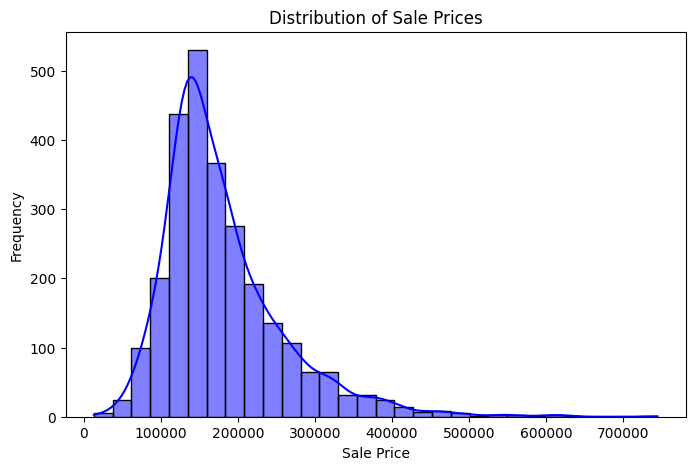

In [ ]:
# Visualization 1: Distribution of Sale Prices
plt.figure(figsize=(8, 5))
sns.histplot(house_cleaned['SalePrice'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

The histogram shows that most house prices are concentrated at lower values, with a right-skewed distribution.

<ipython-input-126-0e59a367e32f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=house_cleaned['Overall Qual'], y=house_cleaned['SalePrice'], palette="Blues")


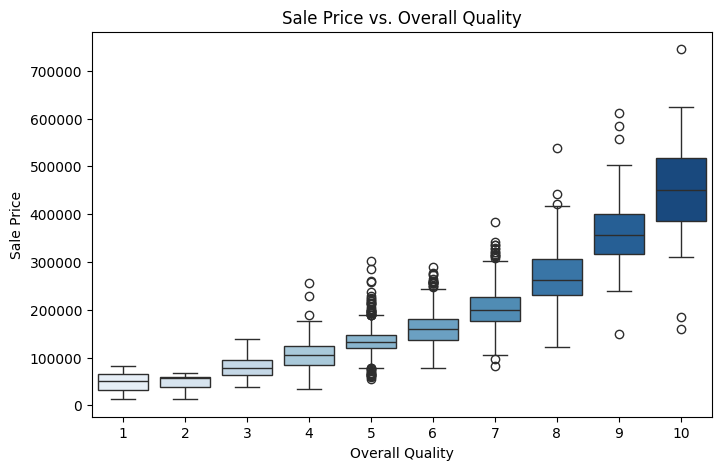

In [ ]:
# Visualization 2: Relationship Between Overall Quality and Sale Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=house_cleaned['Overall Qual'], y=house_cleaned['SalePrice'], palette="Blues")
plt.title("Sale Price vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

Higher overall quality tends to correspond with higher sale prices.

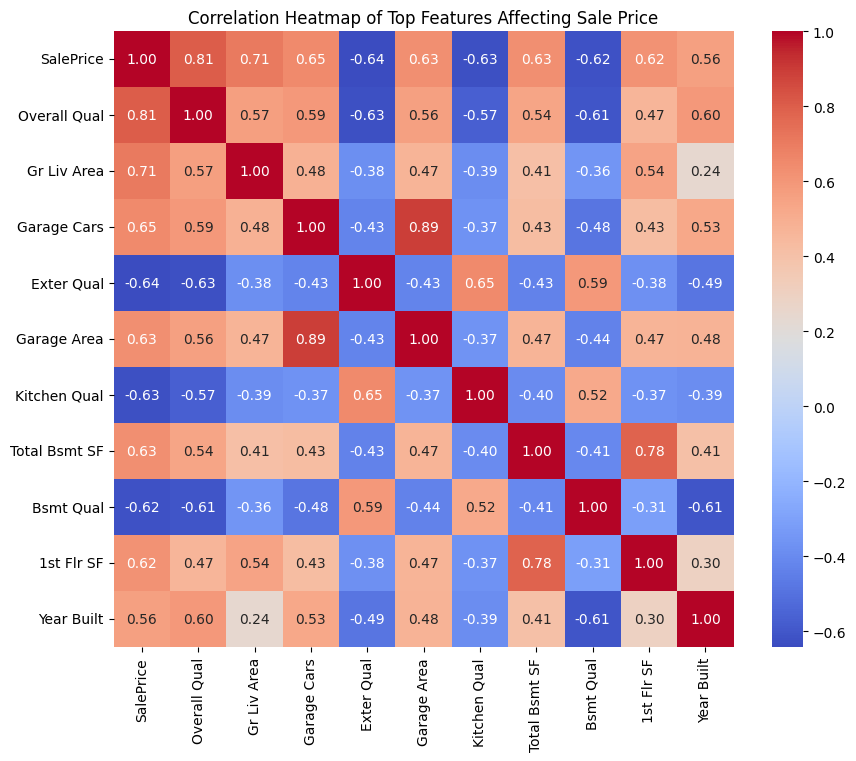

In [ ]:
# Visualization 3: Correlation Heatmap (Top 10 Features Most Correlated with SalePrice)
corr_matrix = house_cleaned.corr()
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index

plt.figure(figsize=(10, 8))
sns.heatmap(house_cleaned[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top Features Affecting Sale Price")
plt.show()

The strongest correlations with Sale Price include Overall Quality, Gr Liv Area and Garage Cars.Also,Some quality-related factors (Exterior, Kitchen, Basement) show negative correlations, possibly due to multicollinearity.

###Feature Selection

In [ ]:
### 1. Feature Selection using Correlation
corr_matrix = house_cleaned.corr()
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index
print("Top correlated features with SalePrice:\n", top_corr_features)

Top correlated features with SalePrice:
 Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Exter Qual',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', 'Bsmt Qual',
       '1st Flr SF', 'Year Built', 'Garage Finish', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt'],
      dtype='object')


Create a list of the most highly correlated predictors.

In [ ]:
corr_series = corr_matrix.abs().unstack()
lt_df = (
  corr_series[ ( 0.92 < corr_series ) & ( corr_series < 1 )]
    .sort_values( ascending=False)
    .drop_duplicates()
    .to_frame()
    .rename( columns={0:"A"} )
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs


Index([], dtype='object')

In [ ]:
lower_triangle = np.tril(abs(corr_matrix)+1.1, k=-1)-1.1
lower_triangle_df  = pd.DataFrame(lower_triangle, index=corr_matrix.index, columns=corr_matrix.columns)
lt_df = (
  lower_triangle_df
    .unstack()
    .to_frame()
    .rename( columns={0:"A"} )
    .query( "A > 0.92")
    .sort_values( by = "A", ascending=False )
    .reset_index()
)
high_corrs = pd.concat([lt_df["level_0"], lt_df["level_1"]]).value_counts().index
high_corrs

Index([], dtype='object')

We couldn't identify any highly correlated features using both approaches.

## Processing

###Linear Regression

In [ ]:
# Define features and target
#X = house_cleaned.drop(columns=['SalePrice'])
X = house_cleaned[top_corr_features.drop('SalePrice', errors='ignore')]
y = house_cleaned['SalePrice']
# normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.48623738, -0.9936772 ,  0.31135878, ..., -1.01758939,
        -0.96622387, -0.5736776 ],
       [-1.48623738, -0.40593582,  0.31135878, ...,  0.80042093,
        -0.82274574, -0.45235802],
       [-0.06905858, -0.24637717, -1.00393249, ..., -1.01758939,
        -1.63578844,  0.03292032],
       ...,
       [ 1.34812022, -0.54731691,  0.31135878, ..., -1.01758939,
        -0.15318117,  0.11380004],
       [-0.06905858, -0.29687041,  0.31135878, ...,  0.80042093,
        -0.48796346, -0.16927899],
       [ 0.63953082,  1.66630698,  0.31135878, ...,  0.80042093,
         0.75551361,  0.84171755]])

In [ ]:
X.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Exter Qual',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', 'Bsmt Qual',
       '1st Flr SF', 'Year Built', 'Garage Finish', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt'],
      dtype='object')

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [ ]:
X.head()

,Overall Qual,Gr Liv Area,Garage Cars,Exter Qual,Garage Area,Kitchen Qual,Total Bsmt SF,Bsmt Qual,1st Flr SF,Year Built,Garage Finish,Full Bath,Year Remod/Add,Garage Yr Blt
0,4,1005,2.0,3,440.0,3,1005.0,4,1005,1964,2,1,1964,1964.0
1,4,1296,2.0,3,516.0,3,0.0,4,1296,1967,2,2,1967,1967.0
2,6,1375,1.0,3,544.0,2,780.0,4,780,1937,2,1,1950,1979.0
3,8,1848,2.0,2,592.0,2,975.0,2,975,2000,1,2,2000,2000.0
4,7,1135,2.0,2,576.0,2,560.0,2,575,1936,1,1,2007,1971.0


In [ ]:
X_scaled.head()

,Overall Qual,Gr Liv Area,Garage Cars,Exter Qual,Garage Area,Kitchen Qual,Total Bsmt SF,Bsmt Qual,1st Flr SF,Year Built,Garage Finish,Full Bath,Year Remod/Add,Garage Yr Blt
0,-1.486237,-0.993677,0.311359,0.674208,-0.145571,0.786142,-0.093543,0.968148,-0.393454,-0.240538,0.943078,-1.017589,-0.966224,-0.573678
1,-1.486237,-0.405936,0.311359,0.674208,0.211679,0.786142,-2.433348,0.968148,0.367281,-0.141532,0.943078,0.800421,-0.822746,-0.452358
2,-0.069059,-0.246377,-1.003932,0.674208,0.343298,-0.417724,-0.617380,0.968148,-0.981651,-1.131590,0.943078,-1.017589,-1.635788,0.032920
3,1.348120,0.708955,0.311359,-0.750381,0.568929,-0.417724,-0.163388,-0.560141,-0.471880,0.947533,-0.277185,0.800421,0.755514,0.882157
4,0.639531,-0.731112,0.311359,-0.750381,0.493719,-0.417724,-1.129576,-0.560141,-1.517563,-1.164592,-0.277185,-1.017589,1.090296,-0.290599


In [ ]:
# Define RMSPE function
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Fit a linear regression model
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

# Make predictions
y_pred_lr = my_fit_lr.predict(X_train)

# Compute RMSPE
rmspe_lr = rmspe(y_train, y_pred_lr)

print(f'RMSPE for Linear Regression: {rmspe_lr}')

RMSPE for Linear Regression: 0.2422542592986471


In [ ]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results

,Predictor,Linear
1,Gr Liv Area,24340.161693
0,Overall Qual,21194.170489
6,Total Bsmt SF,6647.707709
8,1st Flr SF,6506.492696
9,Year Built,6322.977560
2,Garage Cars,6203.493895
4,Garage Area,3826.570803
12,Year Remod/Add,3316.419326
13,Garage Yr Blt,-2597.024038
10,Garage Finish,-3100.548273


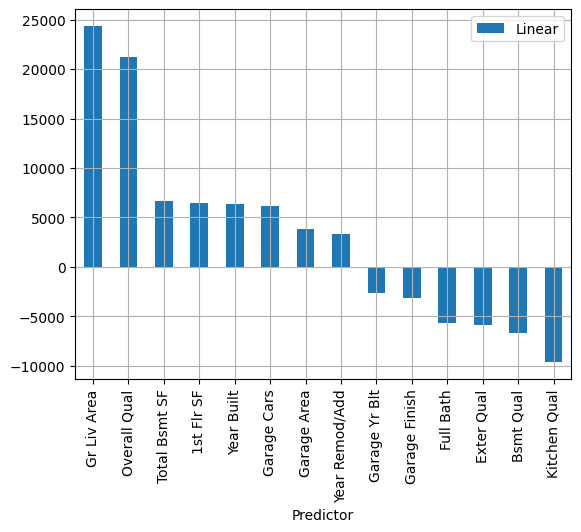

In [ ]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()

In [ ]:
# Custom function to compute RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Custom scoring function for cross_val_score
def rmspe_scorer(model, X, y):
    y_pred = model.predict(X)
    return rmspe(y, y_pred)

# Initialize the Linear Regression model
model = LinearRegression()

# Calculate CV RMSPE using cross-validation
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring=rmspe_scorer,
    cv=10
)

# Calculate the mean RMSPE across folds
rmspe_value = abs(results.mean())
print(f"CV RMSPE: {rmspe_value}")

CV RMSPE: 0.22605064243298462


### Regularization - Ridge Regression

In [ ]:
# Define and train Ridge Regression model
my_fit_rr = Ridge(alpha=1)
my_fit_rr.fit(X_train, y_train)

# Predictions
y_pred = my_fit_rr.predict(X_test)

# Calculate RMSPE
rmspe = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2)) * 100
print(f'RMSPE: {rmspe:.2f}%')


RMSPE: 17.74%


In [ ]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 70]

# Create empty list to hold results
results_alpha = []

for i in alph:
    # Train the model
    my_fit_rr = Ridge(alpha=i)
    my_fit_rr.fit(X_train, y_train)

    # Predict using cross-validation
    y_pred = my_fit_rr.predict(X_scaled)

    # Compute RMSPE
    rmspe_score = rmspe(y, y_pred)
    results_alpha.append(rmspe_score)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

           Alpha     RMSPE
0   1.000000e-15  0.230742
1   1.000000e-10  0.230742
2   1.000000e-08  0.230742
3   1.000000e-04  0.230742
4   1.000000e-03  0.230742
5   1.000000e-02  0.230742
6   1.000000e-01  0.230746
7   1.000000e+00  0.230781
8   2.000000e+00  0.230820
9   3.000000e+00  0.230860
10  4.000000e+00  0.230899
11  5.000000e+00  0.230939
12  1.000000e+01  0.231137
13  2.000000e+01  0.231537
14  3.000000e+01  0.231940
15  5.000000e+01  0.232753
16  7.000000e+01  0.233572


In [ ]:
# Custom function to compute RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Custom scoring function for cross_val_score
def rmspe_scorer(model, X, y):
    y_pred = model.predict(X)
    return rmspe(y, y_pred)

# Retrain the model with alpha = 10
my_fit_rr = Ridge(alpha=10)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSPE using cross-validation
results = cross_val_score(
    my_fit_rr,
    X_scaled,
    y,
    scoring=rmspe_scorer,
    cv=10
)

# Calculate the mean RMSPE across folds
rmspe_value = abs(results.mean())
print(f"CV RMSPE: {rmspe_value}")

CV RMSPE: 0.22618655586907815


In [ ]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge
1,Gr Liv Area,24340.161693,21057.755615
0,Overall Qual,21194.170489,24104.595734
6,Total Bsmt SF,6647.707709,6166.242231
8,1st Flr SF,6506.492696,-5847.871740
9,Year Built,6322.977560,3913.052090
2,Garage Cars,6203.493895,-9625.596043
4,Garage Area,3826.570803,6668.559363
12,Year Remod/Add,3316.419326,-6678.094296
13,Garage Yr Blt,-2597.024038,6549.811460
10,Garage Finish,-3100.548273,6197.304826


### Regularization - Lasso Regression

In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 70]

# Create empty list to hold results
results_alpha = []

def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

for i in alph:
    # Train the model
    my_fit_lasso = Lasso(alpha=i, tol=0.01, max_iter=100_000)
    my_fit_lasso.fit(X_train, y_train)

    # Calculate CV RMSPE
    results = cross_val_score(my_fit_lasso, X_train, y_train, scoring=rmspe_scorer, cv=10)
    rmspe_value = abs(results.mean())
    results_alpha.append(rmspe_value)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+12, tolerance: 1.325e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.192e+11, tolerance: 1.206e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e+12, tolerance: 1.176e

           Alpha      RMSPE
16  7.000000e+01  23.667286
15  5.000000e+01  23.683201
14  3.000000e+01  23.711770
13  2.000000e+01  23.721716
9   3.000000e+00  23.727505
8   2.000000e+00  23.728205
7   1.000000e+00  23.729276
10  4.000000e+00  23.729671
12  1.000000e+01  23.729770
6   1.000000e-01  23.730312
5   1.000000e-02  23.730336
4   1.000000e-03  23.730346
3   1.000000e-04  23.730346
2   1.000000e-08  23.730346
0   1.000000e-15  23.730346
1   1.000000e-10  23.730346
11  5.000000e+00  23.730597


In [ ]:
results_df

,Alpha,RMSPE
0,1.000000e-15,23.730346
1,1.000000e-10,23.730346
2,1.000000e-08,23.730346
3,1.000000e-04,23.730346
4,1.000000e-03,23.730346
5,1.000000e-02,23.730336
6,1.000000e-01,23.730312
7,1.000000e+00,23.729276
8,2.000000e+00,23.728205
9,3.000000e+00,23.727505


In [ ]:
# Custom function to compute RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Custom scoring function for cross_val_score
def rmspe_scorer(model, X, y):
    y_pred = model.predict(X)
    return rmspe(y, y_pred)

# Train the Lasso model
my_fit_lasso = Lasso(alpha=70, tol=0.01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSPE using cross-validation
results = cross_val_score(
    my_fit_lasso,
    X_scaled,
    y,
    scoring=rmspe_scorer,
    cv=10
)

# Calculate the mean RMSPE across folds
rmspe_value = abs(results.mean())
print(f"CV RMSPE: {rmspe_value}")

CV RMSPE: 0.22554040693927732


In [ ]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge,Lasso
1,Gr Liv Area,24340.161693,21057.755615,21319.354081
0,Overall Qual,21194.170489,24104.595734,24196.327995
6,Total Bsmt SF,6647.707709,6166.242231,6221.040676
8,1st Flr SF,6506.492696,-5847.871740,-5775.695427
9,Year Built,6322.977560,3913.052090,3773.202279
2,Garage Cars,6203.493895,-9625.596043,-9620.408771
4,Garage Area,3826.570803,6668.559363,6678.373665
12,Year Remod/Add,3316.419326,-6678.094296,-6648.890457
13,Garage Yr Blt,-2597.024038,6549.811460,6487.474189
10,Garage Finish,-3100.548273,6197.304826,5982.840703


## Data Visualization/Communication of Results


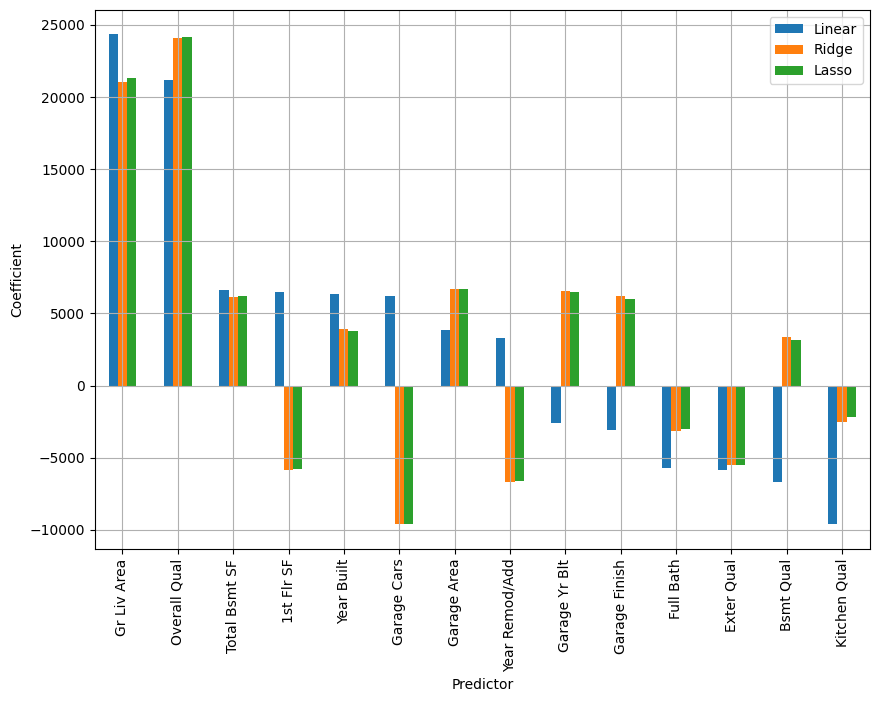

In [ ]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

Compared to Linear Regression, Ridge and Lasso have generally smaller absolute values of coefficients.This shows how regularization helps in preventing overfitting by shrinking coefficients.

For all models, Gr Liv Area  and Overall Qual seem to be the most important predictors of SalePrice.

RMSPE values after cross validation seems to be almost same for all 3 models.